In [40]:
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from glob import glob 
from fastcore.xtras import load_pickle

import matplotlib.pyplot as plt 
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use(['science', 'nature'])

import matplotx

import pandas as pd 
import numpy as np

%matplotlib inline

In [42]:
all_res = glob('out/**/*.pkl')

In [43]:
compiled_res = []
compiled_gpr = []

for res in all_res:
    loaded = load_pickle(res)

    num_points = loaded['num_train_points']

    metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['mean_absolute_error'],
        'max_error': loaded['max_error'],
        'mse': loaded['mean_squared_error']
    }

    compiled_res.append(metrics)


    gpr_metrics = {
        'num_train_points': loaded['num_train_points'],
        'mae': loaded['baseline']['mean_absolute_error'],
        'max_error': loaded['baseline']['max_error'],
        'mse': loaded['baseline']['mean_squared_error']
    }

    compiled_gpr.append(gpr_metrics)

In [44]:
compiled_res = pd.DataFrame(compiled_res)
compiled_gpr = pd.DataFrame(compiled_gpr)

In [45]:
compiled_grouped_res = compiled_res.groupby([ 'num_train_points']).agg(['mean', 'std', 'count'])

In [46]:
compiled_gpr_grouped = compiled_gpr.groupby(['num_train_points']).agg(['mean', 'std'])

In [47]:
compiled_grouped_res

mae                 max_error                  \
                      mean       std count      mean       std count   
num_train_points                                                       
10                2.640584  0.117651     5  8.502000  0.812447     5   
20                2.731860  0.211667     4  9.110000  0.688815     4   
50                2.469320  0.090165     5  8.224000  0.581231     5   
100               1.899230  0.351440     4  6.120000  1.138537     4   
200               0.805530  0.059767     4  4.075000  0.436692     4   
500               0.639133  0.022174     3  2.943333  0.412836     3   

                        mse                  
                       mean       std count  
num_train_points                             
10                10.331680  0.920768     5  
20                11.383185  1.594730     4  
50                 9.098974  0.562224     5  
100                5.652357  1.889109     4  
200                1.114815  0.170391     4  
500                0.656776  0.025485     3

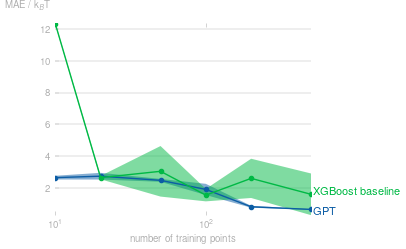

In [48]:
with plt.style.context(matplotx.styles.dufte):
    fig, ax = plt.subplots(1,1)

    ax.plot(
        compiled_grouped_res.loc[:].index, 
        compiled_grouped_res.loc[:]['mae']['mean'], 
        label='GPT', 
        marker='o'
    )

    ax.fill_between(
        compiled_grouped_res.loc[ :].index, 
        compiled_grouped_res.loc[ :]['mae']['mean'] - compiled_grouped_res.loc[:]['mae']['std'], 
        compiled_grouped_res.loc[ :]['mae']['mean'] + compiled_grouped_res.loc[:]['mae']['std'], 
          alpha=.5
    )

    ax.plot(
        compiled_gpr_grouped.loc[:].index, 
        compiled_gpr_grouped['mae']['mean'], 
        label='XGBoost baseline',
        marker='o'
    )

    ax.fill_between(
        compiled_gpr_grouped.loc[ :].index, 
        compiled_gpr_grouped.loc[:]['mae']['mean'] - compiled_gpr_grouped.loc[ :]['mae']['std'], 
        compiled_gpr_grouped.loc[ :]['mae']['mean'] + compiled_gpr_grouped.loc[ :]['mae']['std'], 
        alpha=.5
    )

    matplotx.line_labels(fontsize=8)

    ax.set_xlabel('number of training points', labelpad=4)
    matplotx.ylabel_top(r'MAE / k$_B$T')
    ax.set_xscale('log')

fig.savefig('polymer_regression_res.pdf', bbox_inches='tight')
